In [44]:
# import libraries
import pandas as pd

In [45]:
# load data
df = pd.read_csv('performance_data.csv')

#inspect the dimensons
print('There are {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

There are 18003 rows and 5 columns.


In [46]:
# view samples of the data
df.tail(20)

,Event Name,Athlete Name,Team,Mark,Event Type
17983,200,"Egizio, Jake",PSU-Behrend (M),22.40,Individual
17984,300,"Luce, Brendan",PSU-Behrend (M),38.12,Individual
17985,400,"Egizio, Jake",PSU-Behrend (M),50.08,Individual
17986,500,"Klein, Kody",PSU-Behrend (M),1:09.35,Individual
17987,600,"Elgin, Joe",PSU-Behrend (M),1:32.19,Individual
17988,800,"Klein, Kody",PSU-Behrend (M),1:57.25,Individual
17989,1000,"Seevers, Jason",PSU-Behrend (M),2:44.47,Individual
17990,Mile,"Klein, Kody",PSU-Behrend (M),4:23.11,Individual
17991,3000,"Klein, Kody",PSU-Behrend (M),9:05.67,Individual
17992,5000,"Kerr, Bennett",PSU-Behrend (M),15:58.57,Individual


In [47]:
# add column for gender (based on gender in team column)
df['Gender'] = df['Team'].str[-3:]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18003 entries, 0 to 18002
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Event Name    18003 non-null  object
 1   Athlete Name  17985 non-null  object
 2   Team          18003 non-null  object
 3   Mark          18003 non-null  object
 4   Event Type    18003 non-null  object
 5   Gender        18003 non-null  object
dtypes: object(6)
memory usage: 844.0+ KB


In [49]:
# count the frequency of missing values in each row (i.e. how many columns are empty)
df.isnull().sum(axis=1).sort_values(ascending = False)


2652     1
3509     1
4594     1
1491     1
637      1
        ..
6017     0
6018     0
6019     0
6020     0
18002    0
Length: 18003, dtype: int64

In [50]:
# check the frequency of null values in each column
df.isnull().sum()

Event Name       0
Athlete Name    18
Team             0
Mark             0
Event Type       0
Gender           0
dtype: int64

In [51]:
# handle missing data -- deletion
df = df[df.isnull().sum(axis=1) < 1] # delete rows with 1 or more missing variables (in each row)


In [52]:
# ensure that missing data is removed
df.isnull().sum()

Event Name      0
Athlete Name    0
Team            0
Mark            0
Event Type      0
Gender          0
dtype: int64

In [53]:
# remove data from other event types
df = df.drop(df[df['Event Type'] == 'DMR'].index)
df = df.drop(df[df['Event Type'] == 'HJ'].index)
df = df.drop(df[df['Event Type'] == 'PV'].index)
df = df.drop(df[df['Event Type'] == 'LJ'].index)
df = df.drop(df[df['Event Type'] == 'TJ'].index)
df = df.drop(df[df['Event Type'] == 'SP'].index)
df = df.drop(df[df['Event Type'] == 'WT'].index)
df = df.drop(df[df['Event Type'] == 'Hep'].index)
df = df.drop(df[df['Event Type'] == '4x400'].index)
df = df.drop(df[df['Event Type'] == '4x800'].index)

In [54]:
# remove non-running events
df['Mark']  = df['Mark'].astype('string')

filtered_df = df[~df['Mark'].str.contains('m')]

In [55]:
# convert times to seconds/hundredths
def convert_mark(mark):
    """Converts string time to seconds/hundredths
    
    Parameters:
    - mark (str): time as minutes:seconds.tenths
    
    Returns:
    - float: time in seconds """

    if ":" not in mark:
        return mark
    else:

        minutes, seconds_with_hundredths = mark.split(":")
    
        # Convert minutes to seconds and add to seconds
        total_seconds = int(minutes) * 60 + int(seconds_with_hundredths.split('.')[0])

        hundredths = ("0." + seconds_with_hundredths.split('.')[1]).replace("#", "")
        hundredths = hundredths.replace("@", "")
        hundredths = hundredths.replace("(600)", "")
        hundredths = hundredths.replace("(440)", "")
        hundredths = hundredths.replace("(4400)", "")
        hundredths = hundredths.replace("#", "")
    
        # Combine seconds with hundredths
        total_seconds += float(hundredths)
    
        return total_seconds

convert_mark("9:57.17")

# apply to all times in data frame
filtered_df.loc[:, 'Mark in Seconds'] = filtered_df['Mark'].apply(convert_mark)


C:\Users\joeyt\AppData\Local\Temp\ipykernel_21672\2760865588.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Mark in Seconds'] = filtered_df['Mark'].apply(convert_mark)


In [56]:
print(filtered_df['Mark in Seconds'].unique())

import numpy as np

# Define a custom conversion function
def safe_float_conversion(value):
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply the custom conversion function to the 'Mark in Seconds' column
filtered_df.loc[:, 'Mark in Seconds'] = filtered_df['Mark in Seconds'].apply(safe_float_conversion)

# Drop rows with NaN values from the DataFrame
filtered_df.dropna(inplace=True)


['7.94' '26.16' '59.10' ... 958.57 93.71 620.22]


C:\Users\joeyt\AppData\Local\Temp\ipykernel_21672\732043009.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)


In [57]:
#subsetting: only extract 400m event
df_400m = filtered_df[filtered_df['Event Name'] == '400']

<Axes: xlabel='Gender'>

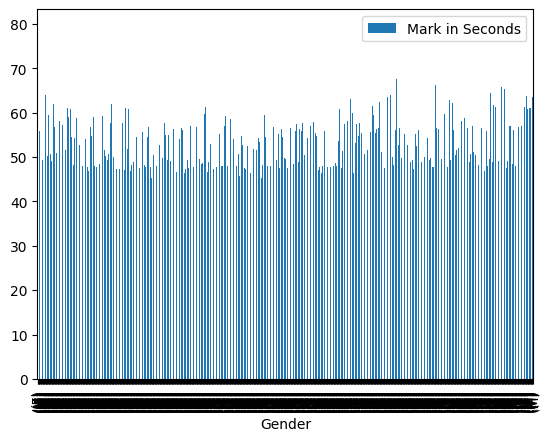

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_400m.plot.bar(x='Gender', y='Mark in Seconds')

In [59]:
filtered_df['Mark in Seconds']

0          7.94
1         26.16
2          59.1
3         99.05
4        139.14
          ...  
17992    958.57
17993      8.63
17994     93.71
17995    203.85
17996    620.22
Name: Mark in Seconds, Length: 12262, dtype: object